# Customer Churn Analysis Project

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
d = pd.read_csv('customer_churn.csv')

In [5]:
df = pd.DataFrame(d)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total rows: 7043
    
Total Columns : 21
    
Object columns: 18


TotalCharges are in object type

Checking for the blank values in  it

In [9]:
count=0
for i in df['TotalCharges']:
    if(i ==' '):
        count+=1
    else:
        pass
print(count)

11


11 blank values in total charges

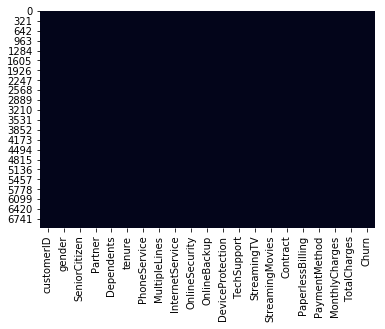

In [10]:
sns.heatmap(df.isnull(),cbar=False)

No null values in the dataset

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

In [12]:
df['TotalCharges'].isnull().sum()

11

Blank value is replaced by nan

And nan values are replaced by median

In [13]:
df['TotalCharges'] = np.where(df['TotalCharges'].isnull(),df['TotalCharges'].median(),df['TotalCharges'])

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [15]:
numerical_columns = [col for col in df if df[col].dtypes!='O']

In [16]:
numerical_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
categorical_columns = [col for col in df if df[col].dtypes=='O']

In [18]:
categorical_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# Univariate Analysis

SeniorCitizen


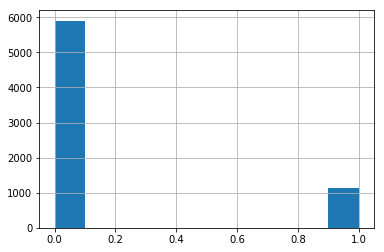

tenure


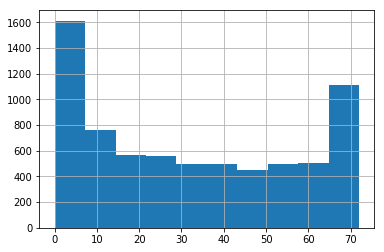

MonthlyCharges


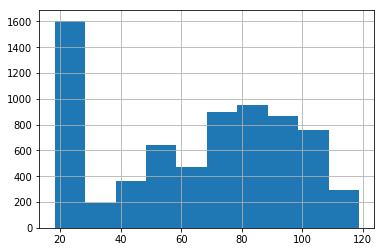

TotalCharges


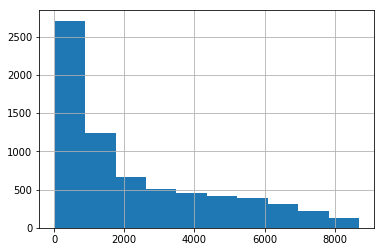

In [19]:
for i in numerical_columns:
    print(i)
    df[i].hist(bins=10)
    plt.show()

Tenure ranges from 0 to 70

For most of the people Total charges is between 0 to 1000

Maximum people pay monthly charges from 20 to 30



In [20]:
print(df['SeniorCitizen'].value_counts())
    

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


0 : non senior citizen
    
1: senior citizen

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


most spreaded feature is TotalCharges

Least Spreaded feature is senior citizen(discreate)

Minimum monthly charge paid is 18 

And maximum monthly charge paid is 118

Minimum total charge paid is 18 

And maximum total charge paid is 8684



In [22]:
for i in categorical_columns:
    print(i)
    print(df[i].value_counts())
    print('.........................')

customerID
4291-TPNFG    1
6952-OMNWB    1
8393-DLHGA    1
6719-OXYBR    1
3197-NNYNB    1
             ..
7296-PIXQY    1
6585-WCEWR    1
5879-SESNB    1
1237-WIYYZ    1
2968-SSGAA    1
Name: customerID, Length: 7043, dtype: int64
.........................
gender
Male      3555
Female    3488
Name: gender, dtype: int64
.........................
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
.........................
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
.........................
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
.........................
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
.........................
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
.........................
OnlineSecurity
No                     3498
Yes                    2019
No internet service 

Customer id is the unique values for each customer

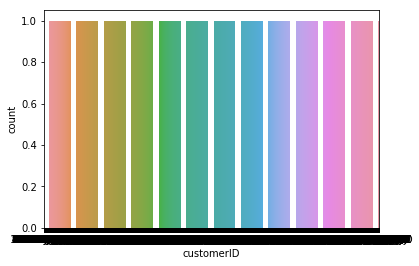

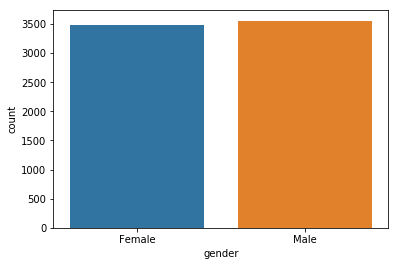

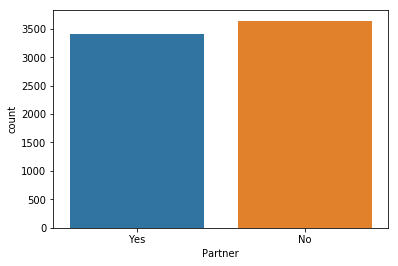

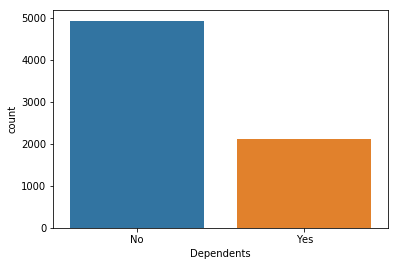

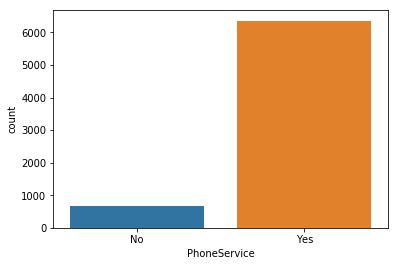

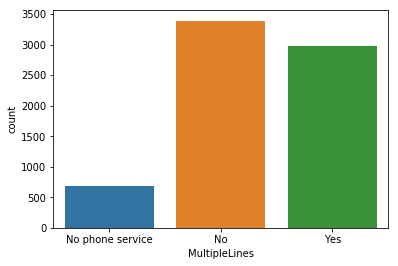

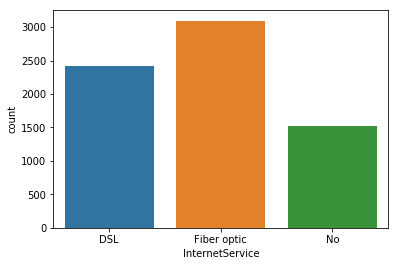

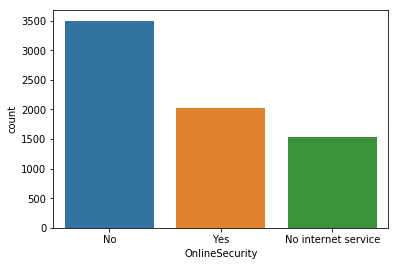

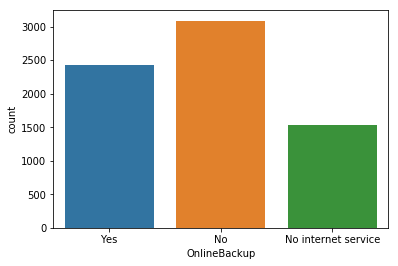

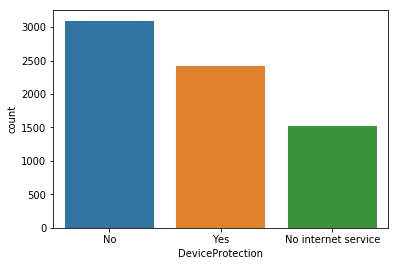

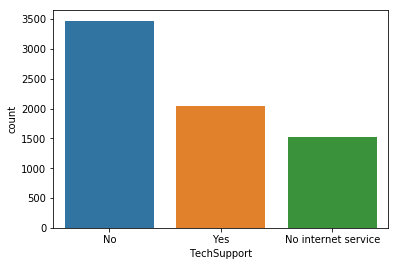

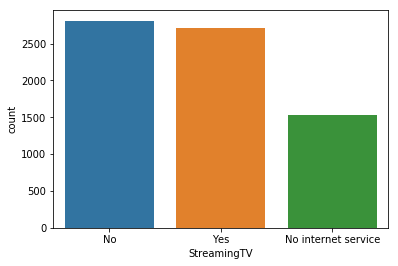

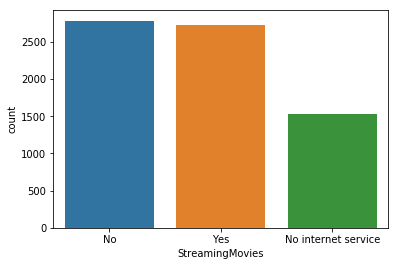

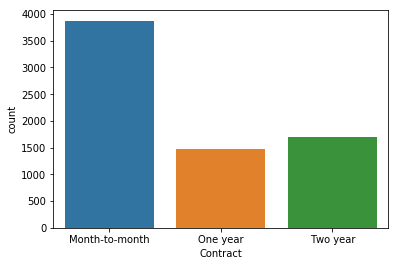

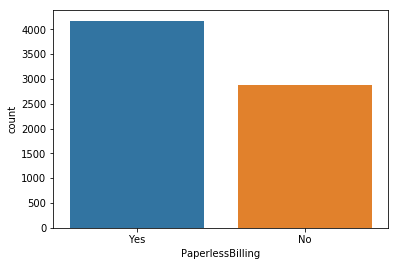

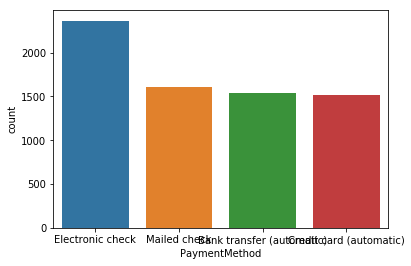

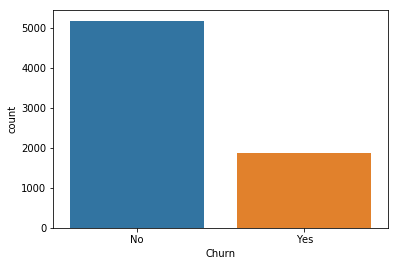

In [23]:
for i in categorical_columns:
    sns.countplot(df[i])
    plt.show()

Most of the people are using phone service without multilines

Fibre optic is the internet service people are using

most of the customes are not using Online security and online backup 

More customes for month to month contract

Frequent payment method used : electronic check



In [24]:
len(df['customerID'].unique())

7043

In [25]:
df.drop('customerID',axis=1,inplace=True) #unique values

# Bi variate Analysis

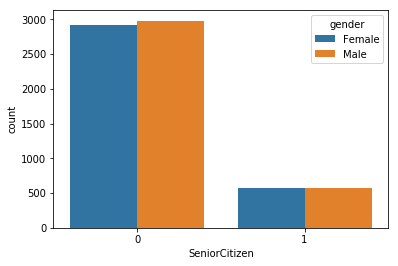

In [26]:
sns.countplot(df['SeniorCitizen'],hue='gender',data=df)

Equal number of female and male in senior citizen

and in non senior citizens almost equal

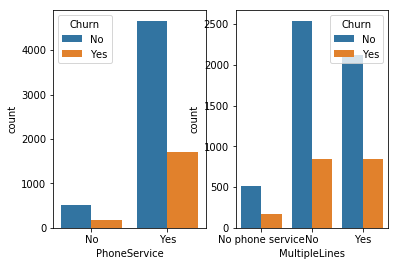

In [27]:
plt.subplot(1,2,1)
sns.countplot(df['PhoneService'],hue='Churn',data=df)
plt.subplot(1,2,2)
sns.countplot(df['MultipleLines'],hue='Churn',data=df)


customers using phone servies and using multiplelines leave the services  more

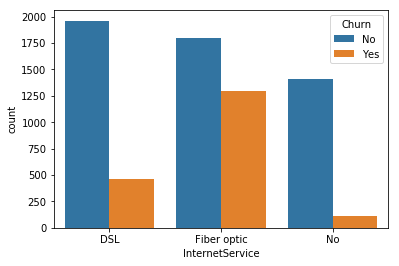

In [28]:

sns.countplot(df['InternetService'],hue='Churn',data=df)

majority of the Customer using fibre optic left the service

then customer using DSL

And least customers who are not using internet services 

conclusion:
    
Customers are not satisfied with fibre optic service

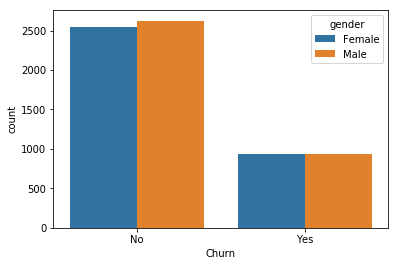

In [29]:
sns.countplot(df['Churn'],hue='gender',data=df)

Gender is not affecting customer churn

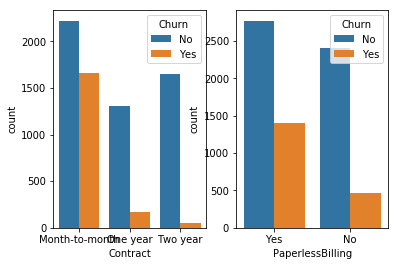

In [30]:
plt.subplot(1,2,1)
sns.countplot(df['Contract'],hue='Churn',data=df)
plt.subplot(1,2,2)
sns.countplot(df['PaperlessBilling'],hue='Churn',data=df)

majority of the Customers with month to month contract nd using paperless billing left the services

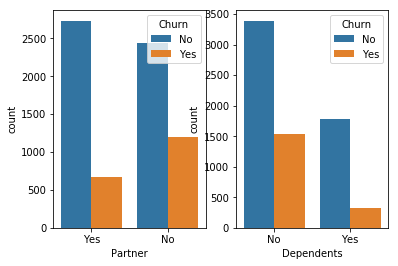

In [31]:
plt.subplot(1,2,1)
sns.countplot(df['Partner'],hue='Churn',data=df)
plt.subplot(1,2,2)
sns.countplot(df['Dependents'],hue='Churn',data=df)

Customers with no partners

and no dependents stop taking the services

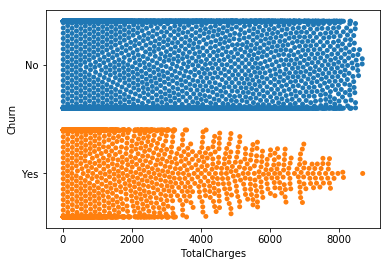

In [32]:
sns.swarmplot(x='TotalCharges',y='Churn',data=df)

People who stopped taking the services uused to pay less charges

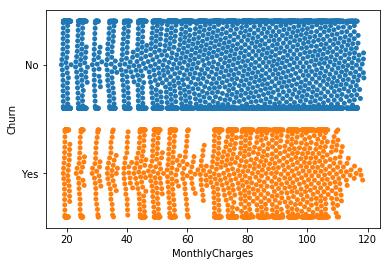

In [33]:
sns.swarmplot(x='MonthlyCharges',y='Churn',data=df)

observation:
    
Customers using fibre optic service and phone services without multiplelines with month to month 

contract and using paperless billing are the group of people stopped continuing the services

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
lab_en = LabelEncoder()

In [36]:
df['Churn'] = lab_en.fit_transform(df['Churn'])

In [37]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

0 : no
    
1: yes

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
ord_en = OrdinalEncoder()

Encoding all the categorical variables

In [40]:
for i in categorical_columns:
    if(i=='customerID'):
        pass
    else:
        df[i] = ord_en.fit_transform(df[i].values.reshape(-1,1))
    

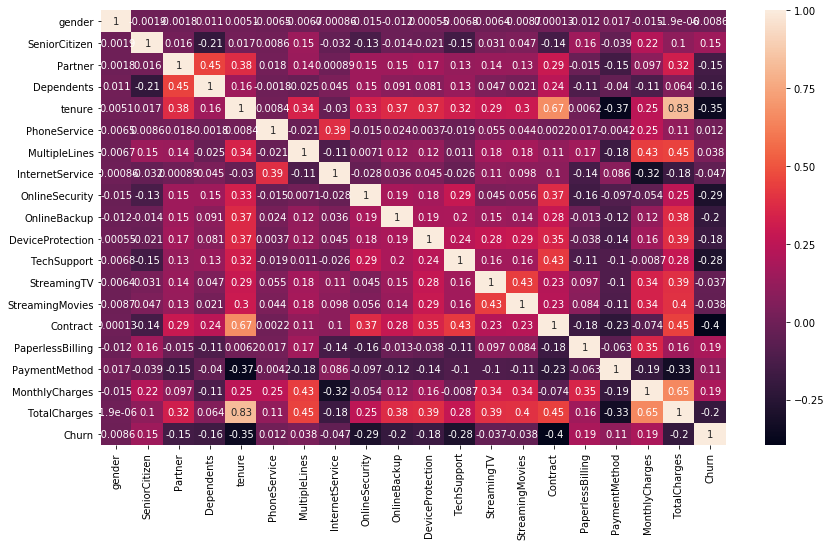

In [41]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

Target variable is strongly correlated with contract and tenure

And least correlaed with gender

In [42]:
df['Churn'] = df['Churn'].astype('int')

In [43]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


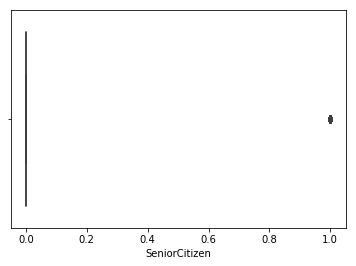

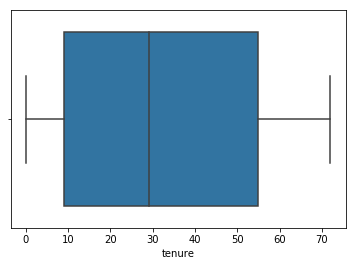

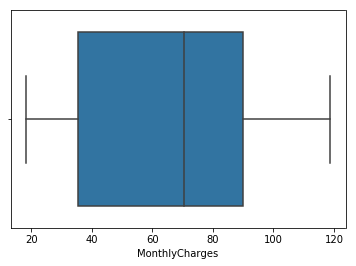

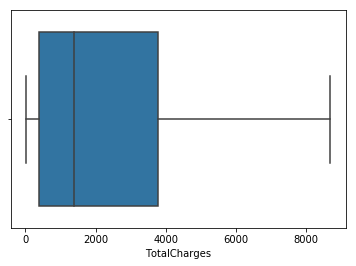

In [44]:
for i in numerical_columns:
    sns.boxplot(df[i])
    plt.show()

No outliers in the numerical features

1.8336327440928564


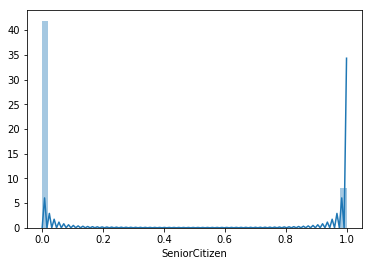

0.2395397495619829


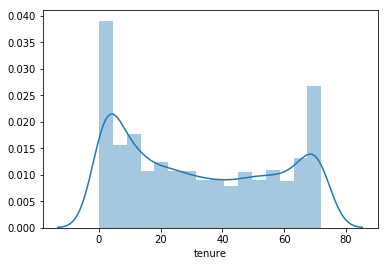

-0.22052443394398033


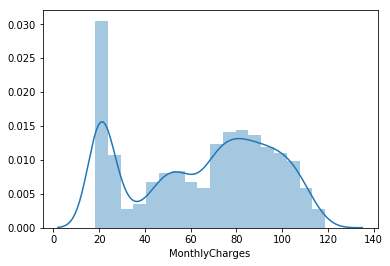

0.9637890936414893


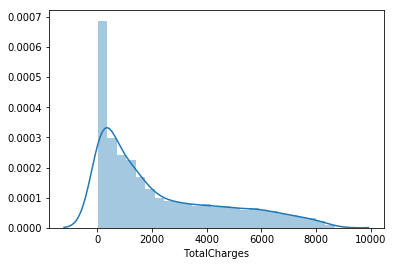

In [45]:
for i in numerical_columns:
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()

Total charges is skewed 

Senior citizen is showing skewness because it has discreate values

In [46]:
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

In [47]:
df['TotalCharges'].skew()  #skewness is removed

0.012996097169276428

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
stnd_sc = StandardScaler()

First scaling these two features because of large values

In [50]:
df['MothlyCharges'] = stnd_sc.fit_transform(df['MonthlyCharges'].values.reshape(-1,1))

In [51]:
df['tenure'] = stnd_sc.fit_transform(df['tenure'].values.reshape(-1,1))

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
min_sc = MinMaxScaler()

In [54]:
df_n =  pd.DataFrame(min_sc.fit_transform(df),columns=df.columns)

Dataset after scaling

In [55]:
df_n.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MothlyCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.024756,0.0,0.115423
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.542227,0.0,0.385075
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.117646,1.0,0.354229
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,...,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.536234,0.0,0.239303
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.149401,1.0,0.521891


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Splitting the data

In [58]:
df_n.drop('MothlyCharges',axis=1,inplace=True)

In [59]:
x = df_n.drop('Churn',axis=1)

In [60]:
y = df['Churn']

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33)

In [62]:
log_reg = LogisticRegression()

In [63]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [64]:
predict_x = log_reg.predict(x_test)

In [65]:
accuracy_score(predict_x,y_test)

0.803010752688172

Basic model(logistic regression) is giving 80% accuracy

In [66]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
algos = [LogisticRegression,SVC,DecisionTreeClassifier,KNeighborsClassifier]

Finding best random state

In [67]:
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    l = LogisticRegression()
    l.fit(x_train,y_train)
    p = l.predict(x_test)
    p1 = l.predict(x_train)
    print('accuracy score of test data at random state,',i,' ',accuracy_score(p,y_test))
    print('accuracy score of train data at random state,',i,' ',accuracy_score(p1,y_train))
    print('--------------------------------------------')

accuracy score of test data at random state, 1   0.8068817204301075
accuracy score of train data at random state, 1   0.8052140737600678
--------------------------------------------
accuracy score of test data at random state, 2   0.8008602150537635
accuracy score of train data at random state, 2   0.8109368376430691
--------------------------------------------
accuracy score of test data at random state, 3   0.8167741935483871
accuracy score of train data at random state, 3   0.8035184400169564
--------------------------------------------
accuracy score of test data at random state, 4   0.7939784946236559
accuracy score of train data at random state, 4   0.811148791860958
--------------------------------------------
accuracy score of test data at random state, 5   0.7991397849462366
accuracy score of train data at random state, 5   0.8109368376430691
--------------------------------------------
accuracy score of test data at random state, 6   0.8068817204301075
accuracy score of train

Random state  = 3 is giving best result

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=3)

In [69]:
for i in algos:
    obj = i()
    obj.fit(x_train,y_train)
    predict = obj.predict(x_test)
    print(i)
    print('accuracy score',accuracy_score(predict,y_test))
    print(classification_report(predict,y_test))
    print('-------------------')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy score 0.8167741935483871
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1876
           1       0.52      0.70      0.60       449

    accuracy                           0.82      2325
   macro avg       0.72      0.77      0.74      2325
weighted avg       0.84      0.82      0.83      2325

-------------------
<class 'sklearn.svm._classes.SVC'>
accuracy score 0.8043010752688172
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      1919
           1       0.46      0.69      0.55       406

    accuracy                           0.80      2325
   macro avg       0.69      0.76      0.71      2325
weighted avg       0.84      0.80      0.82      2325

-------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
accuracy score 0.7217204301075268
              precision    recall  f1-score   support


Logistic is giving best result with 81 accuracy score

In [70]:
from sklearn.model_selection import cross_val_score

In [72]:
for i in algos:
    obj = i()
    obj.fit(x_train,y_train)
    prd = obj.predict(x_test)
    cross_score = cross_val_score(obj,x,y,cv=5)
    print(i)
    print('cross val score',cross_score.mean())
    print('accuracy score',accuracy_score(prd,y_test))
    print('..........................................')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
cross val score 0.8059067318859281
accuracy score 0.8167741935483871
..........................................
<class 'sklearn.svm._classes.SVC'>
cross val score 0.7990925825859733
accuracy score 0.8043010752688172
..........................................
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
cross val score 0.7302282606942383
accuracy score 0.7217204301075268
..........................................
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
cross val score 0.7572055051938834
accuracy score 0.7729032258064517
..........................................


Taking logistic model ahead as it is giving best accuracy as well as model is not overfitted

Accuracy score 0.8167741935483871
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1876
           1       0.52      0.70      0.60       449

    accuracy                           0.82      2325
   macro avg       0.72      0.77      0.74      2325
weighted avg       0.84      0.82      0.83      2325

[[1584  292]
 [ 134  315]]


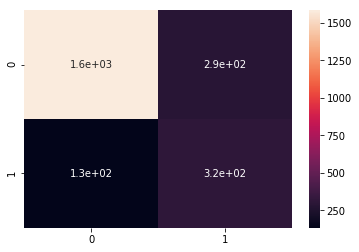

In [73]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
prd = lr.predict(x_test)
print('Accuracy score',accuracy_score(prd,y_test))
con_m = confusion_matrix(prd,y_test)
print(classification_report(prd,y_test))
print(con_m)
sns.heatmap(con_m,annot=True)

# Ensemble Technique

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf_classifier = RandomForestClassifier(n_estimators=100)

In [76]:
rf_classifier.fit(x_train,y_train)
pred_rf = rf_classifier.predict(x_test)

In [83]:
print('accuracy score',accuracy_score(y_test,pred_rf))
cv_score = cross_val_score(rf_classifier,x,y,cv=7)
print('cross val score',cv_score.mean())

accuracy score 0.8021505376344086
cross val score 0.791707973185148


In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
grd_boost = GradientBoostingClassifier(n_estimators=100,random_state=0)

In [117]:
grd_boost.fit(x_train,y_train)
pred_gd = grd_boost.predict(x_test)

In [118]:
accuracy_score(y_test,pred_gd)

0.8124731182795699

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
ada_boost = AdaBoostClassifier(n_estimators=100,random_state=0)

In [80]:
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [81]:
pred_ad = ada_boost.predict(x_test)

In [85]:
print('accuracy score',accuracy_score(y_test,pred_ad))
cv_score = cross_val_score(ada_boost,x,y,cv=7)
print('cross val score',cv_score.mean())

accuracy score 0.8133333333333334
cross val score 0.8036327361409639


Ada boost classifier is giving better result than random forest,Gradientboosting and logistic regression

# Hyper Parametric Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [94]:
para_ada = {
    'n_estimators' : [100,300,500],
    'learning_rate' : [.001,.01,.1,1]
}

In [95]:
aboost = AdaBoostClassifier()

In [96]:
grid_ob = GridSearchCV(aboost,param_grid=para_ada,cv=5)

In [97]:
grid_ob.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 300, 500]})

In [93]:
print(grid_ob.best_params_)
print(grid_ob.best_score_)

{'learning_rate': 1, 'n_estimators': 100}
0.8003356579254813


Fitting model with best parameters

In [100]:
grid_ob_best  = AdaBoostClassifier(n_estimators=100,learning_rate=1)

In [101]:
grid_ob_best.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [102]:
pred_best_ob = grid_ob_best.predict(x_test)

# Model is giving accuracy of 81.33%

In [106]:
print('Accuracy score of final model',accuracy_score(pred_best_ob,y_test))
print('classification report of final model')
print(classification_report(pred_best_ob,y_test))

Accuracy score of final model 0.8133333333333334
classification report of final model
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1848
           1       0.54      0.68      0.60       477

    accuracy                           0.81      2325
   macro avg       0.72      0.76      0.74      2325
weighted avg       0.83      0.81      0.82      2325



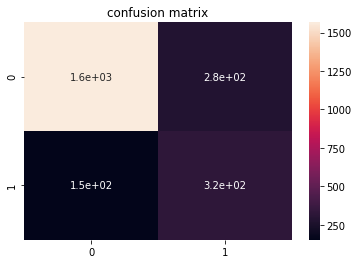

In [113]:
con = confusion_matrix(pred_best_ob,y_test)
plt.title('confusion matrix')
sns.heatmap(con,annot=True)

# Saving the model

In [111]:
import pickle

In [112]:
customer_churn = 'churn.pkl'
pickle.dump(grid_ob_best,open(customer_churn,'wb'))

# Conclusion

In [114]:
original_res = np.array(y_test)
pred_res = np.array(grid_ob_best.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_res,'predicted':pred_res})
df_comparison # original values and predicted values

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
2320,0,0
2321,0,0
2322,0,0
2323,0,0
